In [1]:
%matplotlib inline
import numpy as numpy
import pandas as panda
import matplotlib.pyplot as matplot

In [2]:
series1 = panda.Series([1.1,3.5,5,numpy.nan,10,13])
series1

0     1.1
1     3.5
2     5.0
3     NaN
4    10.0
5    13.0
dtype: float64

In [3]:
series2, series3 = panda.Series(numpy.random.randn(6)), panda.Series(numpy.random.randn(6))
series4 = panda.Series(numpy.random.randn(8))  # Series has different length and filled with NAN
daaframe1 = panda.DataFrame({'A': series1, 'B': series2, 'C': series3, 'D': series4})

daaframe1

,A,B,C,D
0,1.1,-0.571410,0.092843,0.103944
1,3.5,0.475276,0.643262,0.217362
2,5.0,0.392324,0.622362,-2.003207
3,NaN,1.403444,-0.347461,-0.723020
4,10.0,0.242428,0.078960,0.802000
5,13.0,1.345221,0.110696,0.767637
6,NaN,NaN,NaN,0.956408
7,NaN,NaN,NaN,-1.440316


In [4]:
dataframe2 = panda.DataFrame(numpy.random.randn(5,3))

dataframe2     

,0,1,2
0,-0.138634,-1.189765,0.021959
1,-0.368363,1.243601,1.269886
2,-0.964095,-0.332138,0.407498
3,-0.515258,-0.792706,-0.165452
4,1.725908,-1.014629,-1.080353


In [5]:
cols = ['Col A', 'Col B', 'Col C']

# assign columns attribute (names) 
dataframe2.columns = cols

# create an index:
#  generate a sequence of dates with pandas' data_range() method,
#  then assign the index attribute
dates = panda.date_range(start='2017-11-24 13:45:27', freq='M', periods=5)
dataframe2.index = dates

dataframe2

,Col A,Col B,Col C
2017-11-30 13:45:27,-0.138634,-1.189765,0.021959
2017-12-31 13:45:27,-0.368363,1.243601,1.269886
2018-01-31 13:45:27,-0.964095,-0.332138,0.407498
2018-02-28 13:45:27,-0.515258,-0.792706,-0.165452
2018-03-31 13:45:27,1.725908,-1.014629,-1.080353


In [6]:
print 'what is a date_range object?\n\n', dates

what is a date_range object?

DatetimeIndex(['2017-11-30 13:45:27', '2017-12-31 13:45:27',
               '2018-01-31 13:45:27', '2018-02-28 13:45:27',
               '2018-03-31 13:45:27'],
              dtype='datetime64[ns]', freq='M')


In [7]:
dataframe2.loc['2017-12-31 13:45:27']

Col A   -0.368363
Col B    1.243601
Col C    1.269886
Name: 2017-12-31 13:45:27, dtype: float64

In [8]:
dataframe2.loc['2017-12-31 13:45:27','Col C']

1.269885764670279

In [9]:
df1 = panda.DataFrame(numpy.random.randn(6,4), index=list('QWERTY'),columns=list('ASDF'))

df1.loc[['Q','W'],'A':'D']

,A,S,D
Q,-0.981932,-0.721642,-0.870156
W,0.361877,-0.064585,0.669200


# PART 2 DATA

In [10]:
gnacs_x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
colnames = gnacs_x.split('|')

In [11]:
# prevent the automatic compression of wide dataframes (add scroll bar)
panda.set_option("display.max_columns", None)

# get some data, inspect
twitdf = panda.read_csv('Data/twitter_sample.csv', sep='|', names=colnames)

twitdf.tail(5)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


In [12]:
print twitdf.columns
print twitdf.drop( [u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13'],axis=1).columns


Index([u'id', u'postedTime', u'body', u'None',
       u'['twitter_entiteis:urls:url']', u'['None']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'None.1', u'None.2', u'None.3', u'None.4', u'actor:utcOffset',
       u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13', u'actor:displayName',
       u'actor:preferredUsername', u'actor:id', u'gnip:klout_score',
       u'actor:followersCount', u'actor:friendsCount', u'actor:listedCount',
       u'actor:statusesCount', u'Tweet', u'None.14', u'None.15', u'None.16'],
      dtype='object')
Index([u'id', u'postedTime', u'body', u'None',
       u'['twitter_entiteis:urls:url']', u'['None']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'None.1', u'None.2', u'None.3', u'None.4', u'actor:utcOf

In [13]:
twitdf.tail(6)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,#bagdr @limitdemibagdr,None,None,None,None,None,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


In [14]:
twitdf[twitdf.twitter_lang == 'en'].head(5)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
8,"tag:search.twitter.com,2005:351835318028222465",2013-07-01T22:50:51.000Z,@pafcdan Aww good! X,None,None,None,['en'],en,en,"[50.3582949, -4.0930973]",Point,"['[-4.209496, 50.3320883]', '[-4.209496, 50.44...",Polygon,"Plymouth, Plymouth",GB,0,Plymouth,None,None,None,None,None,None,None,None,Becky ❤,BeckyLou90x,26568635,38,380,860,0,3116,Reply,http://twitter.com/pafcdan/statuses/3518344574...,None,None
9,"tag:search.twitter.com,2005:351835318346981377",2013-07-01T22:50:51.000Z,Newest hobby: sending videos back and forth of...,None,None,None,['en'],en,en,"[29.54588264, -95.10669141]",Point,"['[-95.145152, 29.506973]', '[-95.145152, 29.5...",Polygon,"Webster, TX",US,None,"Houston, Texas",None,None,None,None,None,None,None,None,lil beyoncé,beezlebrat,541953037,41,160,135,0,4170,Tweet,None,None,None
11,"tag:search.twitter.com,2005:351835318024028161",2013-07-01T22:50:51.000Z,~FINALLY OFF OF WORK~,None,None,None,['en'],en,en,"[32.86107, -83.72062]",Point,"['[-83.739741, 32.765651]', '[-83.739741, 32.8...",Polygon,"Macon, GA",US,None,None,None,None,None,None,None,None,None,None,Tomeisha Cross,MISSMEISHA223,242505369,18,290,683,0,540,Tweet,None,None,None
12,"tag:search.twitter.com,2005:351835318497980416",2013-07-01T22:50:51.000Z,Rubbing/massaging my feet is like giving me he...,None,None,None,['en'],en,en,"[33.68890281, -84.27369741]",Point,"['[-85.605165, 30.355756999999997]', '[-85.605...",Polygon,"Georgia, US",US,-18000,Atl...,None,None,None,None,None,None,None,None,Poison †,shanbonita,29619102,64,40543,116,486,60465,Tweet,None,None,None
15,"tag:search.twitter.com,2005:351835318724468737",2013-07-01T22:50:51.000Z,@Hayley_Brownn Same!!!! Very sad times😞😞😞😞,None,None,None,['en'],en,en,"[54.6884467, -3.51776393]",Point,"['[-3.580063, 54.454108]', '[-3.580063, 54.964...",Polygon,"Allerdale, Cumbria",GB,-36000,None,None,None,None,None,None,None,None,None,Karl Hine,KarlHine,402334657,42,417,259,1,5242,Reply,http://twitter.com/Hayley_Brownn/statuses/3518...,None,None


In [15]:
twitdf2 = twitdf[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount"]]

twitdf2.head()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount
0,35,178,129,0
1,32,144,215,0
2,18,37,54,0
3,50,438,174,1
4,21,12,6,0


In [16]:
twitdf2.dtypes  

gnip:klout_score        object
actor:followersCount     int64
actor:friendsCount       int64
actor:listedCount        int64
dtype: object

In [17]:
# convert ints / strings to floats, give up on anything else (call it 0.0)
def floatify(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)

In [18]:
twitdf2['gnip:klout_score'] = twitdf2['gnip:klout_score'].map(floatify)

# check again
twitdf2.dtypes

/bda/app/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


gnip:klout_score        float64
actor:followersCount      int64
actor:friendsCount        int64
actor:listedCount         int64
dtype: object

In [19]:
twitdf2 = twitdf2.astype(float)

twitdf2.dtypes

gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
dtype: object

In [20]:
# look at some activity ratios - add col to df
twitdf2['fol/fr'] = twitdf2['gnip:klout_score'] / twitdf2['actor:followersCount']

twitdf2.head()

# can also use the built-in describe() method to get quick descriptive stats on the dataframe
#df2.describe()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,fol/fr
0,35.0,178.0,129.0,0.0,0.196629
1,32.0,144.0,215.0,0.0,0.222222
2,18.0,37.0,54.0,0.0,0.486486
3,50.0,438.0,174.0,1.0,0.114155
4,21.0,12.0,6.0,0.0,1.750000


In [21]:
twitdf.head()

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,['http://twitter.com/ElkaAlb/status/3518353177...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None


In [22]:
twitdf_followers = twitdf[twitdf["actor:followersCount"] >= 100]
twitdf_followers

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
5,"tag:search.twitter.com,2005:351835317801730048",2013-07-01T22:50:51.000Z,I'm at Büyükçekmece Sahil w/ @emineetrk http:/...,['http://test.gnip.com/mock'],['http://t.co/30BZ8dBzxL'],['http://4sq.com/1cJD0J4'],['tr'],en,tr,"[41.01520298, 28.59359264]",Point,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,-18000,FENERBAHÇE TARAFTARINDIR!,None,None,None,None,None,None,None,None,Özgür Ayı,curva1907,361352064,41,226,346,0,7759,Tweet,None,None,None
6,"tag:search.twitter.com,2005:351835317554257920",2013-07-01T22:50:51.000Z,Dile Al Amor &gt;&gt;&gt;,None,None,None,['en'],en,pt,"[47.4355124, -120.3279417]",Point,"['[-120.364921, 47.396859]', '[-120.364921, 47...",Polygon,"Wenatchee, WA",US,-28800,"Wenatchee, Washington",None,None,None,None,None,None,None,None,Mailari ♥,MailariMunoz,30740676,42,247,64,1,2438,Tweet,None,None,None
7,"tag:search.twitter.com,2005:351835318552506369",2013-07-01T22:50:51.000Z,Bağıra bağıra şarkı söylemek istiyoruum,None,None,None,['tr'],en,tr,"[40.8025861, 29.4308738]",Point,None,None,None,None,-18000,None,None,None,None,None,None,None,None,None,Yağmur,ygmreroglu,349059450,40,304,233,0,3558,Tweet,None,None,None
8,"tag:search.twitter.com,2005:351835318028222465",2013-07-01T22:50:51.000Z,@pafcdan Aww good! X,None,None,None,['en'],en,en,"[50.3582949, -4.0930973]",Point,"['[-4.209496, 50.3320883]', '[-4.209496, 50.44...",Polygon,"Plymouth, Plymouth",GB,0,Plymouth,None,None,None,None,None,None,None,None,Becky ❤,BeckyLou90x,26568635,38,380,860,0,3116,Reply,http://twitter.com/pafcdan/statuses/3518344574...,None,None
9,"tag:search.twitter.com,2005:351835318346981377",2013-07-01T22:50:51.000Z,Newest hobby: sending videos back and forth of...,None,None,None,['en'],en,en,"[29.54588264, -95.10669141]",Point,"['[-95.145152, 29.506973]', '[-95.145152, 29.5...",Polygon,"Webster, TX",US,None,"Houston, Texas",None,None,None,None,None,None,None,None,lil beyoncé,beezlebrat,541953037,41,160,135,0,4170,Tweet,None,None,None
10,"tag:search.twitter.com,2005:351835318044983298",2013-07-01T22:50:51.000Z,@DiegoSanRoman no y no me gusta.,None,None,None,['en'],en,es,"[19.34964, -99.19341]",Point,"['[-99.32437499999999, 19.232228]', '[-99.3243...",Polygon,"Álvaro Obregón, Distrito Federal",MX,-28800,None,None,None,None,None,None,None,None,None,Carlos Hermosillo,CHermosillo_FOX,1160945754,62,11873,69,56,1991,Reply,htt

In [23]:
#twitdf_followers.groupby("twitter_lang").size()
#twitdf_followers.groupby("twitter_lang").sum()       
twitdf_followers.groupby("twitter_lang").mean()    

,actor:id,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount
twitter_lang,,,,,
ar,1.438926e+09,458.000000,413.000000,0.000000,1061.000000
en,3.745757e+08,1796.147059,582.735294,16.764706,16364.352941
es,4.486037e+08,1359.285714,441.142857,6.357143,8953.357143
fr,1.270876e+09,116.000000,122.000000,0.000000,3174.000000
he,1.318589e+09,151.000000,284.000000,0.000000,641.000000
id,5.297386e+08,387.000000,245.500000,0.000000,8503.500000
it,5.581492e+08,3541.500000,2047.500000,19.000000,45199.500000
ja,8.132785e+07,152.000000,335.000000,3.000000,2151.000000
ko,1.016681e+09,170.000000,120.000000,0.000000,1094.000000


In [24]:
# though this looks like a normal dataframe, the DataFrameGroupBy object has a heirarchical index
#  this means it may not act as you might expect.
twitlang_gb = twitdf_followers[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')



twitlang_gb.head(5)  

#type of object
#twitlang_gb

,twitter_lang,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
0,tr,35,178,129,2028
1,es,32,144,215,4071
3,es,50,438,174,17636
5,tr,41,226,346,7759
6,pt,42,247,64,2438
7,tr,40,304,233,3558
8,en,38,380,860,3116
9,en,41,160,135,4170
10,es,62,11873,69,1991
11,en,18,290,683,540


In [25]:
twilang_gb_mean = twitlang_gb.aggregate(numpy.mean)  

twilang_gb_mean.head()

,actor:followersCount,actor:friendsCount,actor:statusesCount
twitter_lang,,,
ar,458.000000,413.000000,1061.000000
en,1796.147059,582.735294,16364.352941
es,1359.285714,441.142857,8953.357143
fr,116.000000,122.000000,3174.000000
he,151.000000,284.000000,641.000000


# Plotting

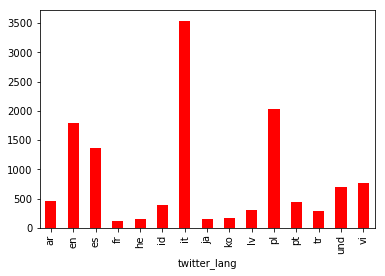

In [26]:
twilang_gb_mean['actor:followersCount'].plot(kind='bar', color='r')

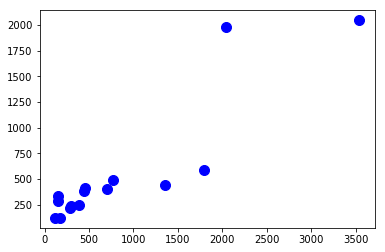

In [27]:
matplot.scatter(x=twilang_gb_mean['actor:followersCount'],\
            y=twilang_gb_mean['actor:friendsCount'],\
            alpha=1,\
            s=100,\
            color='blue',\
            marker='o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd05d5f4250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd05d1df510>]], dtype=object)

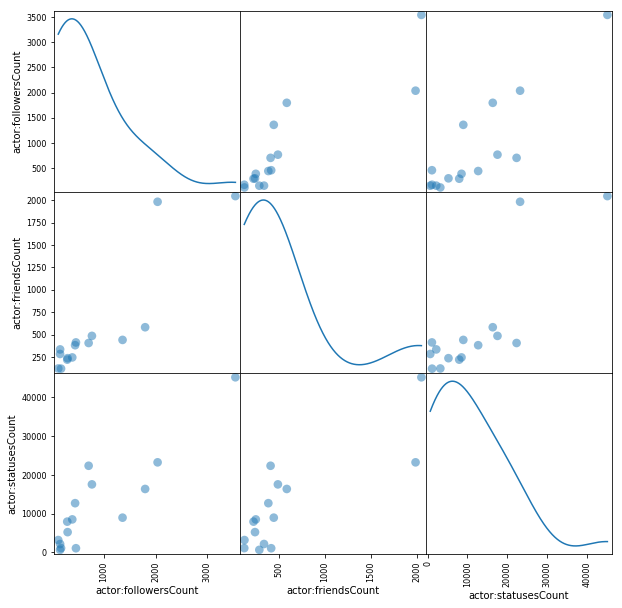

In [28]:
from pandas.plotting import scatter_matrix

scatter_matrix(twilang_gb_mean, alpha=0.5, figsize=(10,10), diagonal='kde', s=300)

In [29]:
dataframe = panda.DataFrame(numpy.random.randn(1000, 5), index=panda.date_range('11/11/2005', periods=1000), columns=list('ABCDE'))
dataframe = dataframe.cumsum()
dataframe.head()

,A,B,C,D,E
2005-11-11,0.694584,-0.202247,0.243944,0.870044,1.803119
2005-11-12,1.860227,0.339443,0.106865,0.081372,1.919468
2005-11-13,2.767325,0.189680,-0.570467,2.089457,2.555166
2005-11-14,1.751438,1.727713,-0.040745,1.328233,3.831420
2005-11-15,3.216289,2.158580,1.320421,1.793763,4.264988


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd04a6ec5d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd04a48d590>]], dtype=object)

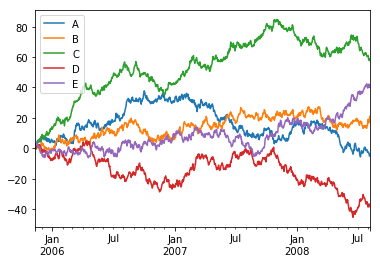

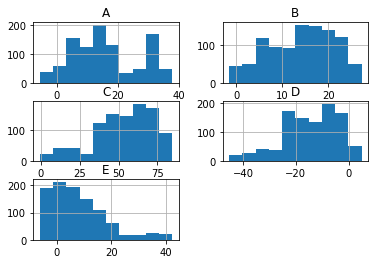

In [30]:
dataframe.plot()
dataframe.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd04a8a62d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd049f7b050>]], dtype=object)

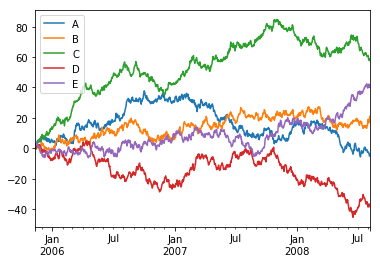

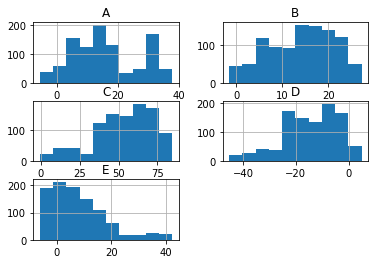

In [31]:
import prettyplotlib

dataframe.plot()
dataframe.hist()

In [32]:
#Plotting univariate distribution
%matplotlib inline
#import numpy as np
#import pandas as pd
from scipy import stats, integrate
#import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [33]:
numpy.random.seed(sum(map(ord, "distributions")))

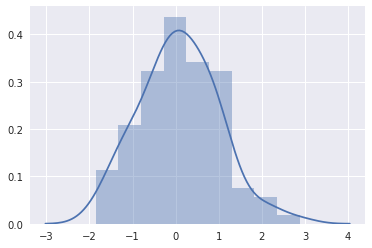

In [34]:
uniV_Distri = numpy.random.normal(size=100)
sns.distplot(uniV_Distri);

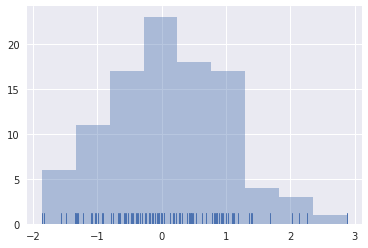

In [35]:
sns.distplot(uniV_Distri, kde=False, rug=True);

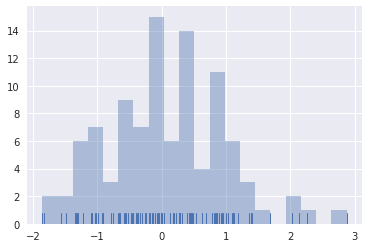

In [36]:
sns.distplot(uniV_Distri, bins=20, kde=False, rug=True);

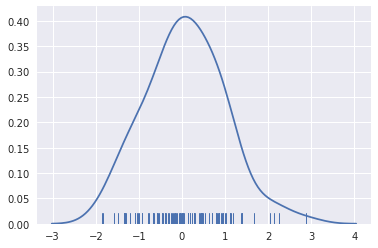

In [37]:
sns.distplot(uniV_Distri, hist=False, rug=True);

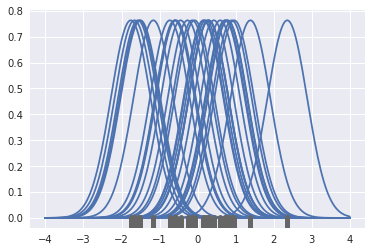

In [38]:
curve = numpy.random.normal(0, 1, size=30)
bandwidth = 1.06 * curve.std() * curve.size ** (-1 / 5.)
support = numpy.linspace(-4, 4, 200)

kernels = []
for x_i in curve:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    matplot.plot(support, kernel, color="b")

sns.rugplot(curve, color=".4", linewidth=5);

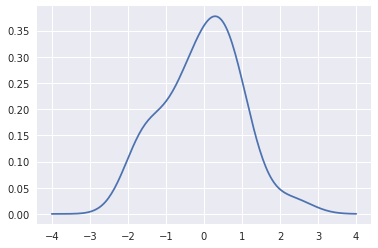

In [39]:
density = numpy.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
matplot.plot(support, density);

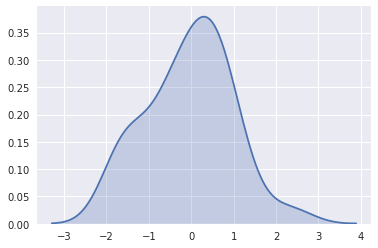

In [40]:
sns.kdeplot(curve, shade=True);

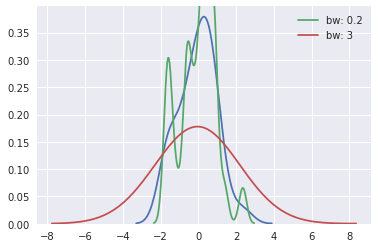

In [41]:
sns.kdeplot(curve)
sns.kdeplot(curve, bw=.2, label="bw: 0.2")
sns.kdeplot(curve, bw=2, label="bw: 3")
matplot.legend();

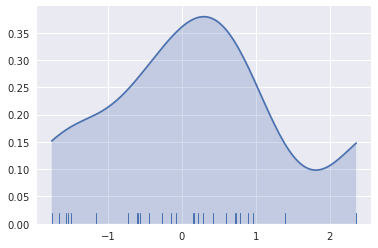

In [42]:
sns.kdeplot(curve, shade=True, cut=0)
sns.rugplot(curve);

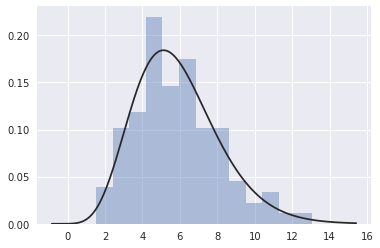

In [43]:
x1 = numpy.random.gamma(6, size=200)
sns.distplot(x1, kde=False, fit=stats.gamma);

# bivariate distributions

In [44]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = numpy.random.multivariate_normal(mean, cov, 200)
biVariateDF = panda.DataFrame(data, columns=["x", "y"])

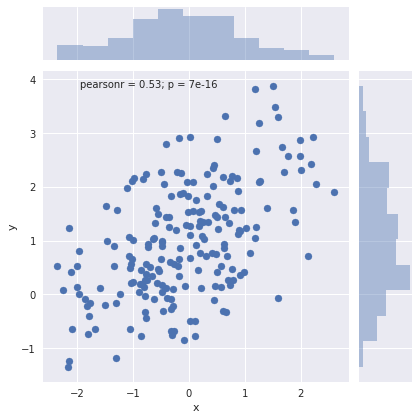

In [45]:
sns.jointplot(x="x", y="y", data=biVariateDF);

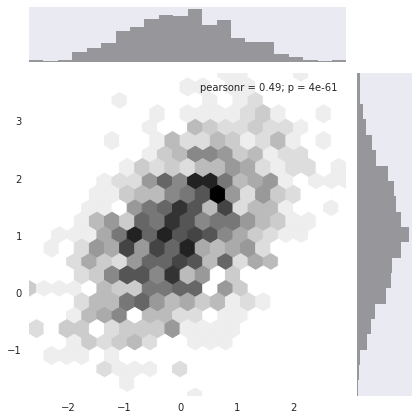

In [46]:
x, y = numpy.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("dark"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

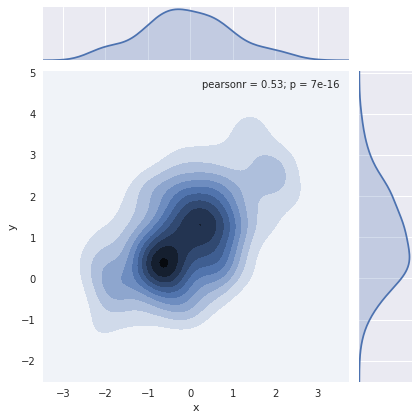

In [47]:
sns.jointplot(x="x", y="y", data=biVariateDF, kind="kde");

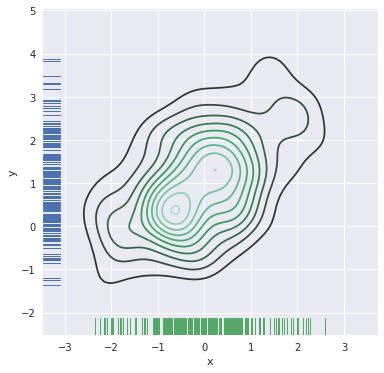

In [48]:
f1, ax1 = matplot.subplots(figsize=(6, 6))
sns.kdeplot(biVariateDF.x, biVariateDF.y, ax=ax1)
sns.rugplot(biVariateDF.x, color="g", ax=ax1)
sns.rugplot(biVariateDF.y, vertical=True, ax=ax1);

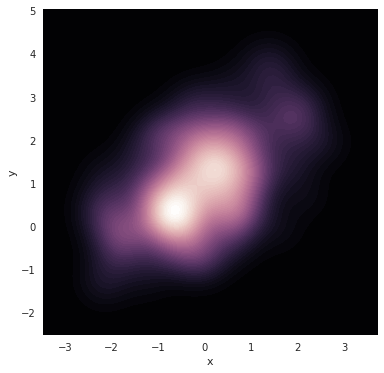

In [49]:
f2, ax2 = matplot.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(biVariateDF.x, biVariateDF.y, cmap=cmap, n_levels=60, shade=True);

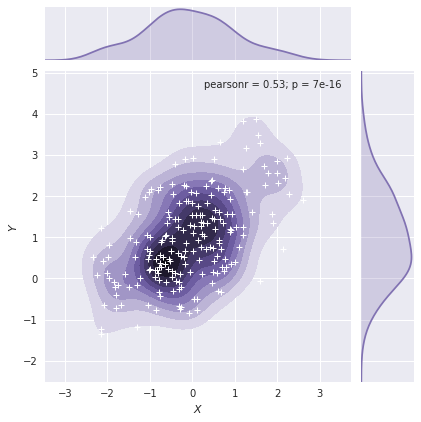

In [50]:
g1 = sns.jointplot(x="x", y="y", data=biVariateDF, kind="kde", color="m")
g1.plot_joint(matplot.scatter, c="w", s=30, linewidth=1, marker="+")
g1.ax_joint.collections[0].set_alpha(0)
g1.set_axis_labels("$X$", "$Y$");

# Visualizing pairwise relationships in a datase

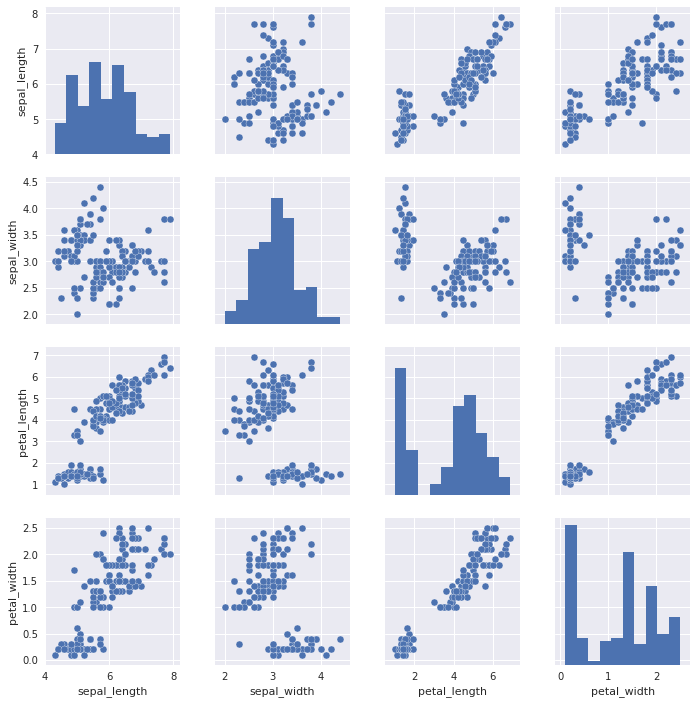

In [51]:
irisDS = sns.load_dataset("iris")
sns.pairplot(irisDS);

/bda/app/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


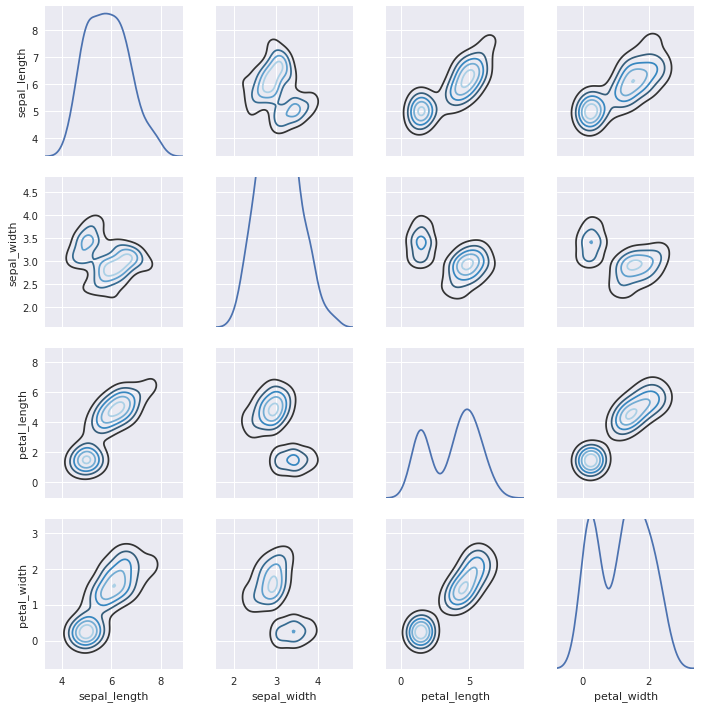

In [52]:
%matplotlib inline
pg = sns.PairGrid(irisDS)
pg.map_diag(sns.kdeplot)
pg.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=5);

# Visualizing linear relationships

In [53]:
%matplotlib inline
import numpy as numpy
import pandas as panda
import matplotlib as mathplb
import matplotlib.pyplot as matplot

In [54]:
import seaborn as sns
sns.set(color_codes=True)

In [55]:
numpy.random.seed(sum(map(ord, "regression")))
tipsDS = sns.load_dataset("tips")

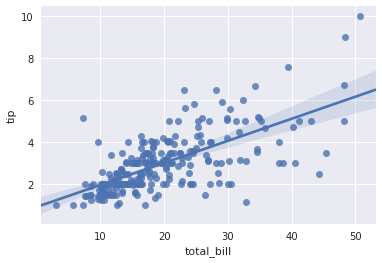

In [56]:
sns.regplot(x="total_bill", y="tip", data=tipsDS);

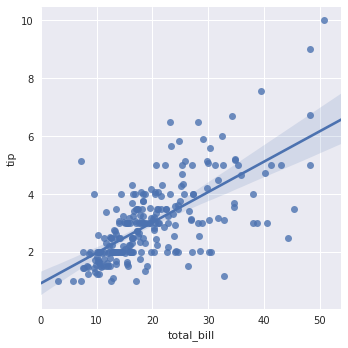

In [57]:
sns.lmplot(x="total_bill", y="tip", data=tipsDS);

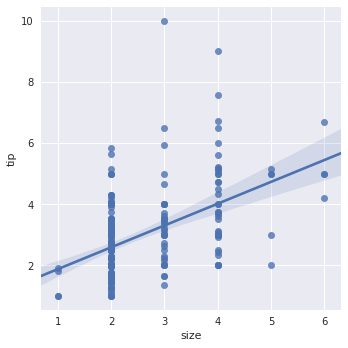

In [58]:
sns.lmplot(x="size", y="tip", data=tipsDS);

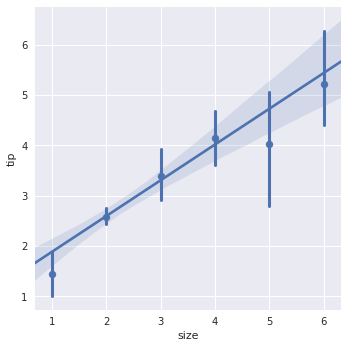

In [59]:
sns.lmplot(x="size", y="tip", data=tipsDS, x_estimator=numpy.mean);

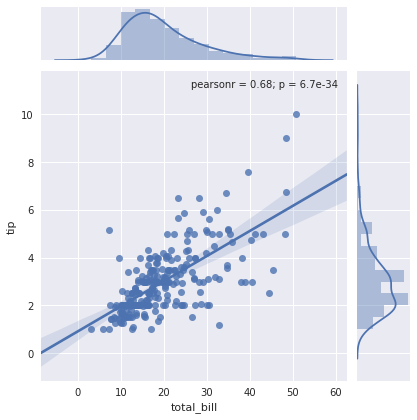

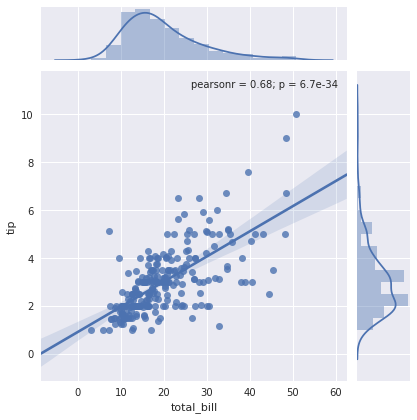

In [60]:
sns.jointplot(x="total_bill", y="tip", data=tipsDS, kind="reg");sns.jointplot(x="total_bill", y="tip", data=tipsDS, kind="reg");

# Plotting with categorical data

In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

titanicDS = sns.load_dataset("titanic")
tipsDS = sns.load_dataset("tips")
irisDS = sns.load_dataset("iris")

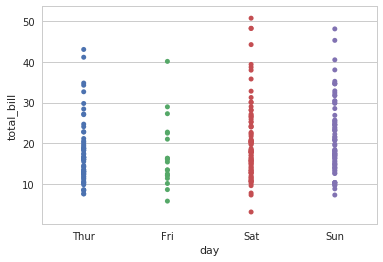

In [62]:
sns.stripplot(x="day", y="total_bill", data=tipsDS);

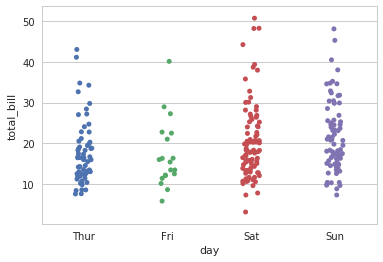

In [63]:
sns.stripplot(x="day", y="total_bill", data=tipsDS, jitter=True);

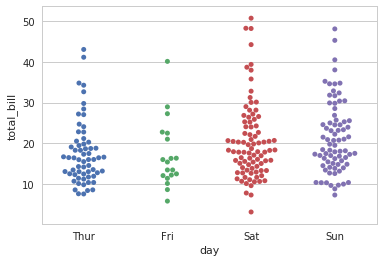

In [64]:
sns.swarmplot(x="day", y="total_bill", data=tipsDS);

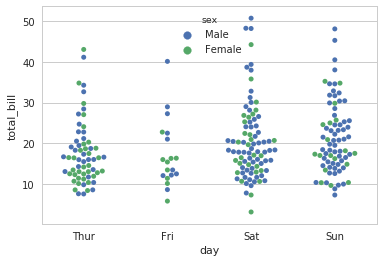

In [65]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tipsDS);

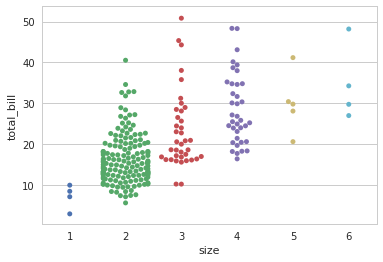

In [66]:
sns.swarmplot(x="size", y="total_bill", data=tipsDS);

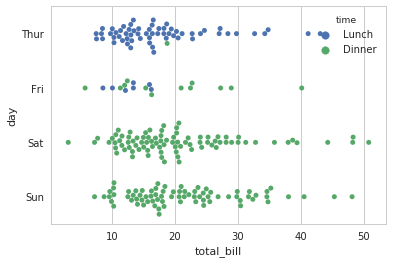

In [67]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tipsDS);